In [1]:
import csv
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
data2015 = pd.read_csv('marathon_results_2015.csv')
data2016 = pd.read_csv('marathon_results_2016.csv')
data2017= pd.read_csv("marathon_results_2017.csv")

In [3]:
len(data2015),len(data2016),len(data2017)

(26598, 26630, 26410)

In [4]:
data2015.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

In [5]:
timeData2015 = data2015[['Bib','Age','M/F','Half', 'Official Time', 'Overall']]
timeData2016 = data2016[['Bib','Age','M/F','Half', 'Official Time', 'Overall']]
timeData2017 = data2017[['Bib','Age','M/F','Half', 'Official Time', 'Overall']]

In [6]:
timeData2015 = timeData2015[ ~ timeData2015['Half'].str.contains('-')]
timeData2016 = timeData2016[ ~ timeData2016['Half'].str.contains('-')]
timeData2017 = timeData2017[ ~ timeData2017['Half'].str.contains('-')]

In [7]:
timeData2015 = timeData2015[ ~ timeData2015['Official Time'].str.contains('-')]
timeData2016 = timeData2016[ ~ timeData2016['Official Time'].str.contains('-')]
timeData2017 = timeData2017[ ~ timeData2017['Official Time'].str.contains('-')]

In [8]:
timeData2015['Official Time']= pd.to_timedelta(timeData2015['Official Time'])
timeData2015['Half']= pd.to_timedelta(timeData2015['Half'])
timeData2016['Official Time']= pd.to_timedelta(timeData2016['Official Time'])
timeData2016['Half']= pd.to_timedelta(timeData2016['Half'])
timeData2017['Official Time']= pd.to_timedelta(timeData2017['Official Time'])
timeData2017['Half']= pd.to_timedelta(timeData2017['Half'])

In [9]:
timeData2015.sample(5)

,Bib,Age,M/F,Half,Official Time,Overall
6837,4261,57,M,01:36:32,03:19:21,6838
20241,24795,65,M,01:53:31,04:08:11,20242
20198,24370,50,F,01:53:35,04:07:58,20199
5383,6863,46,M,01:33:55,03:13:20,5384
10008,19193,50,F,01:43:03,03:29:35,10009


In [10]:
timeData2015['Second Half']=timeData2015['Official Time']-timeData2015['Half']
timeData2016['Second Half']=timeData2016['Official Time']-timeData2016['Half']
timeData2017['Second Half']=timeData2017['Official Time']-timeData2017['Half']

In [11]:
timeData2015['Split Diff']=timeData2015['Second Half'].dt.total_seconds()-timeData2015['Half'].dt.total_seconds()
timeData2016['Split Diff']=timeData2016['Second Half'].dt.total_seconds()-timeData2016['Half'].dt.total_seconds()
timeData2017['Split Diff']=timeData2017['Second Half'].dt.total_seconds()-timeData2017['Half'].dt.total_seconds()

In [12]:
timeData2015.sample(5)

,Bib,Age,M/F,Half,Official Time,Overall,Second Half,Split Diff
14130,29981,36,M,01:48:27,03:42:14,14131,01:53:47,320.0
26399,26954,22,F,02:52:13,05:53:13,26400,03:01:00,527.0
10005,18964,37,F,01:39:42,03:29:34,10006,01:49:52,610.0
22689,17735,58,M,02:08:19,04:27:19,22690,02:19:00,641.0
5648,7214,48,M,01:33:13,03:14:22,5649,01:41:09,476.0


In [13]:
timeData2015['negative']=timeData2015['Split Diff']<0
timeData2016['negative']=timeData2016['Split Diff']<0
timeData2017['negative']=timeData2017['Split Diff']<0

In [14]:
N=timeData2015['Overall'].max()
bins=(range(0,110,10)*N)/100
labels=range(10,110,10)
timeData2015['binned'] = pd.cut(timeData2015['Overall'], bins=bins, labels=labels)
N=timeData2016['Overall'].max()
bins=(range(0,110,10)*N)/100
labels=range(10,110,10)
timeData2016['binned'] = pd.cut(timeData2016['Overall'], bins=bins, labels=labels)
N=timeData2017['Overall'].max()
bins=(range(0,110,10)*N)/100
labels=range(10,110,10)
timeData2017['binned'] = pd.cut(timeData2017['Overall'], bins=bins, labels=labels)

In [15]:
df2015=timeData2015.groupby(['binned'])['negative'].value_counts()
df2016=timeData2016.groupby(['binned'])['negative'].value_counts()
df2017=timeData2017.groupby(['binned'])['negative'].value_counts()

In [16]:
x2015=[]
y2015=[]
for key,value in df2015.items():
    b, t = key
    if t == True:
        x2015.append(b)
        y2015.append(value)
x2016=[]
y2016=[]
for key,value in df2016.items():
    b, t = key
    if t == True:
        x2016.append(b)
        y2016.append(value)
x2017=[]
y2017=[]
for key,value in df2017.items():
    b, t = key
    if t == True:
        x2017.append(b)
        y2017.append(value)

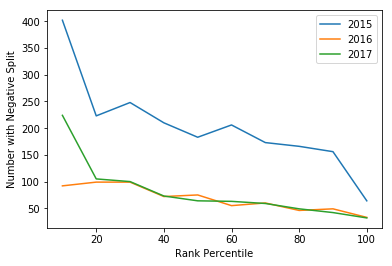

In [17]:
%matplotlib inline
from matplotlib.pyplot import subplots
fig, ax = subplots()
#fig.set_size_inches(18,4)
ax.plot(x2015, y2015, label="2015")
ax.plot(x2016, y2016, label="2016")
ax.plot(x2017, y2017, label="2017")
ax.legend()

ax.set_xlabel("Rank Percentile")
ax.set_ylabel("Number with Negative Split")
fig.savefig("split-rank.png",dpi=500)

How many runners ran a negative split in top 10th, 20th, ... percentiles.

In [18]:
timeData2015['percent'] = (timeData2015['Split Diff']*100)/timeData2015['Half'].dt.total_seconds()
timeData2015['percentInt']=np.rint(timeData2015['percent'])

In [21]:
splitChart2015 = timeData2015['percentInt'].value_counts().rename_axis('split percent').reset_index(name='counts')

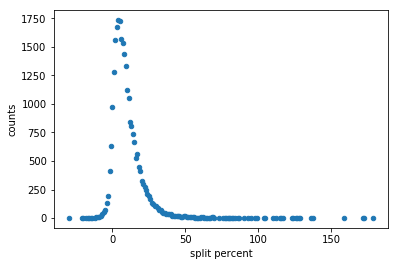

In [23]:
fig, ax = subplots()
splitChart2015.plot.scatter(x='split percent',y='counts', ax=ax)
fig.savefig("percent-split.png",dpi=500)

The split percent is how much more time it took the runner to finish second half than first half expressed in percents. (100*(Second half time-first half time)/ first half time))